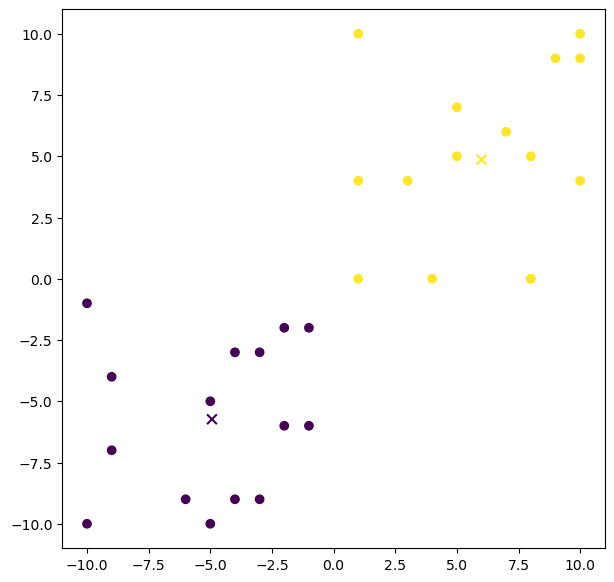

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import operator

# 1. 임의의 데이터 셋 생성
data_set = np.vstack([np.random.randint(low=-10, high=0, size=30).reshape(-1, 2),
            np.random.randint(low=0, high=11, size=30).reshape(-1, 2)])
len_data_set = len(data_set)

# 2. 기준이 되는 임의의 두 데이터 생성
n_class = 2
centroids = np.linspace(start=-10, stop=10, num=n_class * 2).reshape(-1, 2)
class_count = len(centroids)

# 3. 데이터를 순회하며 더 가까운 데이터를 찾아 클래스 분류
classes = [ [idx, centroid] for idx, centroid in enumerate(centroids) ]
classifications = np.full(shape=(len(data_set),), fill_value=-1, dtype=int)

while True:
    temp_classifications = np.full(shape=(len(data_set),), fill_value=-1, dtype=int)
    centroid_eucliean_distances = np.zeros((len_data_set, class_count)) # 각 클래스 기준 데이터들과의 유클리디언 거리 배열
    for (idx_data, data) in enumerate(data_set):
        diffs = abs(centroids - data) # 클래스 기준 데이터와의 값 - 절댓값
        centroid_eucliean_distances[idx_data] = np.sum(diffs, axis=1) ** 0.5 # 유클리디언 거리 계산
    for idx_data in range(len_data_set):
        (min_clazz, _) = min(enumerate(centroid_eucliean_distances[idx_data]), key=operator.itemgetter(1))
        temp_classifications[idx_data] = min_clazz    
    if np.all(classifications == temp_classifications): # 5. 과정을 반복하며 더이상의 분류가 일어나지 않을 때 종료
        break
    classifications = temp_classifications
    
    # 4. 클래스 별 데이터 클러스터의 중심을 구해 클래스 데이터 갱신
    classify_data_idx_set = [ [] for _ in range(class_count) ]
    for (idx, clazz) in enumerate(iterable=classifications):
        classify_data_idx_set[clazz].append(idx)
    means = [ np.mean(data_set[idx_set], axis=0) for idx_set in classify_data_idx_set ]
    centroids = np.stack(means)
    
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(x=data_set[:, 0], y=data_set[:, 1], c=classifications)
ax.scatter(x=centroids[:, 0], y=centroids[:, 1], s=50, marker="x", c=range(class_count))
